In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

data = pd.read_csv("../Sleep_health_and_lifestyle_dataset.csv")

In [51]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,26,Doctor,7.3,7,50,6,Normal,114/90,65,8000,NaN
3,4,Male,32,Sales Representative,6.3,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,27,7,Obese,140/90,85,4200,Sleep Apnea


In [52]:
# checking for missing values

missing_values = data.isnull().sum()
print(missing_values)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             215
dtype: int64


In [53]:
# setting NaN values in sleep disorder column to "None" => NaN = no sleep disorders 

data['Sleep Disorder'].fillna("None", inplace=True)

missing_values = data.isnull().sum()
print(missing_values)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [54]:
# checking for duplicates

duplicate_rows = data.duplicated(subset=data.columns.difference(['Person ID']))
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 82


In [55]:
print(len(data))

374


In [56]:
# deleting duplicates

data.drop(data[duplicate_rows].index, inplace=True)

In [57]:
# checking for duplicates again

duplicate_rows = data.duplicated(subset=data.columns.difference(['Person ID']))
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [58]:
print(len(data))

292


In [59]:
print(data["BMI Category"].unique())


['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [60]:
# setting obese to overweight and normal weight to underweight, since that is how the values should be 

data['BMI Category'].replace('Obese', 'Overweight', inplace=True)
data['BMI Category'].replace('Normal Weight', 'Underweight', inplace=True)

In [61]:
print(data["BMI Category"].unique())

['Overweight' 'Normal' 'Underweight']


In [62]:
#renaming columns for better understanding
new_column_names = {
    'Sleep Duration': 'Sleep Duration (hours/day)',
    'Physical Activity Level': 'Physical Activity Level (minutes/day)',
    'Heart Rate': 'Heart Rate (bpm)'
}

data.rename(columns=new_column_names, inplace=True)

In [63]:
data.head(70)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours/day),Quality of Sleep,Physical Activity Level (minutes/day),Stress Level,BMI Category,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,26,Doctor,7.3,7,50,6,Normal,114/90,65,8000,None
3,4,Male,32,Sales Representative,6.3,4,30,8,Overweight,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,27,7,Overweight,140/90,85,4200,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,Male,35,Teacher,6.7,7,40,5,Overweight,128/84,70,5600,None
83,84,Male,42,Teacher,6.5,4,30,8,Overweight,128/84,70,2300,Insomnia
84,85,Male,35,Software Engineer,7.5,8,60,5,Underweight,120/80,70,8000,None
85,86,Female,35,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None


In [64]:
print(len(data))

292


In [65]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
None           169
Sleep Apnea     72
Insomnia        51
Name: count, dtype: int64

In [66]:
data2 = data.copy(deep=True)

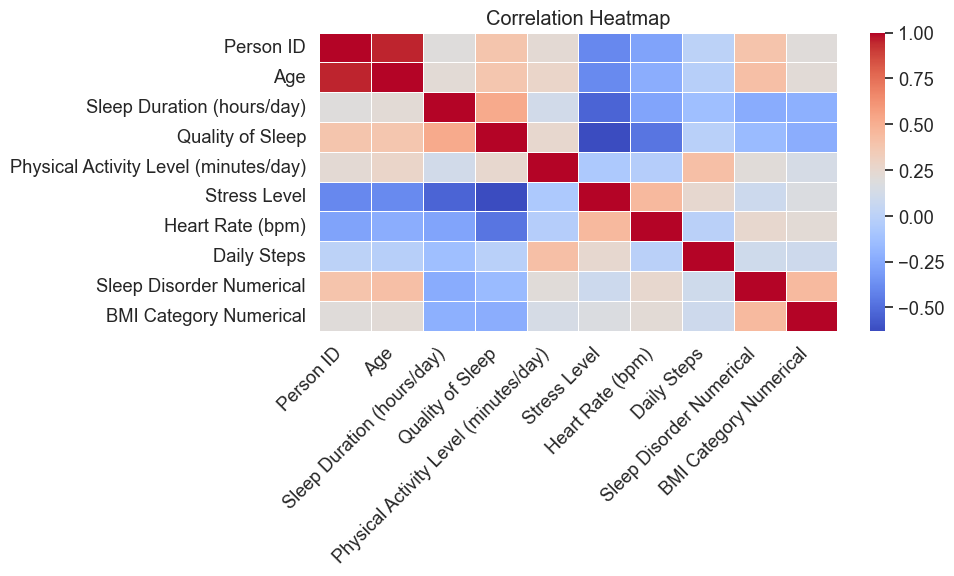

In [67]:
correlate_sleepdisorder_bmi = data.copy()

# Convert 'Sleep Disorder' to numerical values
correlate_sleepdisorder_bmi['Sleep Disorder Numerical'] = correlate_sleepdisorder_bmi['Sleep Disorder'].map({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})

# Convert 'BMI Category' to numerical values
correlate_sleepdisorder_bmi['BMI Category Numerical'] = correlate_sleepdisorder_bmi['BMI Category'].map({'Underweight': 0, 'Normal': 1, 'Overweight': 2})

num_columns = correlate_sleepdisorder_bmi.select_dtypes(include=['int', 'float']).columns

# Calculate the correlation matrix
corr_matrix = correlate_sleepdisorder_bmi[num_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [68]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours/day),Quality of Sleep,Physical Activity Level (minutes/day),Stress Level,BMI Category,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,26,Doctor,7.3,7,50,6,Normal,114/90,65,8000,None
3,4,Male,32,Sales Representative,6.3,4,30,8,Overweight,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,27,7,Overweight,140/90,85,4200,Sleep Apnea


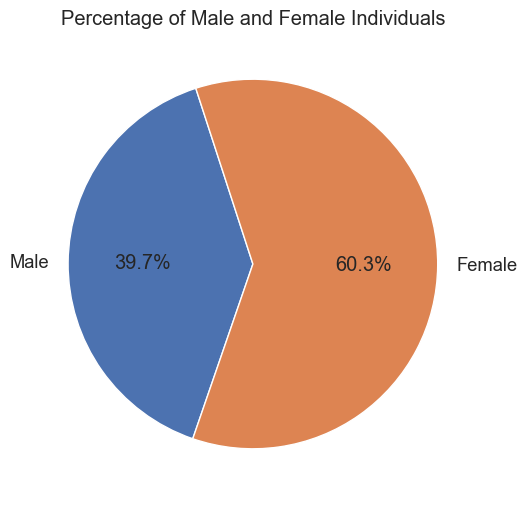

In [69]:
## DEMOGRAPHIC ANALYSIS

# percentage of male and female individuals

male_count = (data['Gender'] == 'Male').sum()
female_count = (data['Gender'] == 'Female').sum()
total_count = len(data)

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=108)
plt.title('Percentage of Male and Female Individuals')
plt.show()

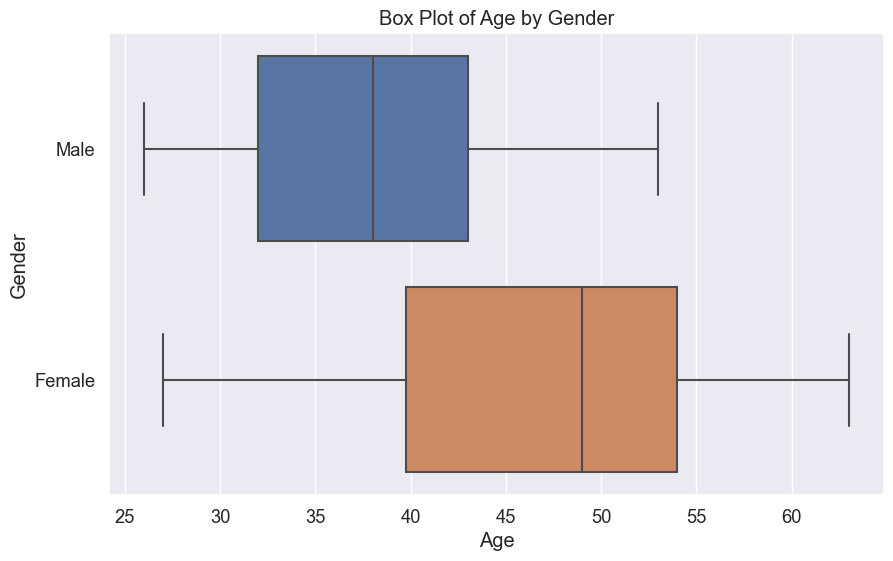

In [70]:
# age by gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Gender', data=data)
plt.title('Box Plot of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

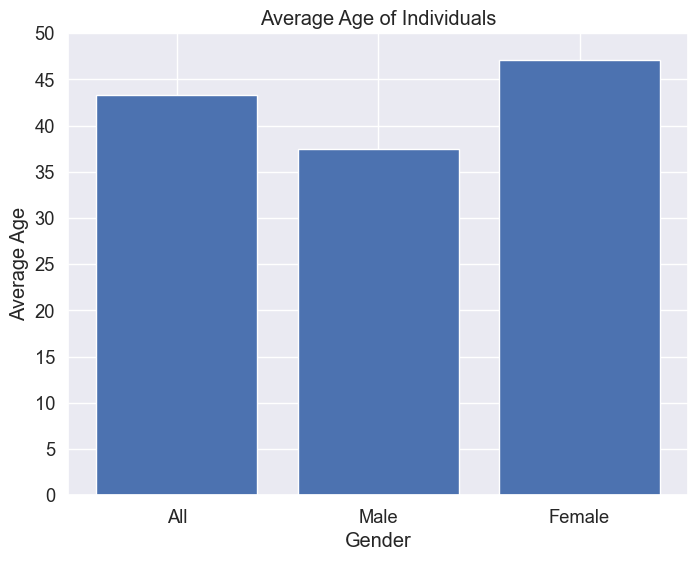

In [71]:
average_age_all = data['Age'].mean()

average_age_male = data[data['Gender'] == 'Male']['Age'].mean()
average_age_female = data[data['Gender'] == 'Female']['Age'].mean()

labels = ['All', 'Male', 'Female']
average_ages = [average_age_all, average_age_male, average_age_female]

plt.figure(figsize=(8, 6))
plt.bar(labels, average_ages)
plt.title('Average Age of Individuals')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.yticks(range(0, 51, 5))
plt.show()

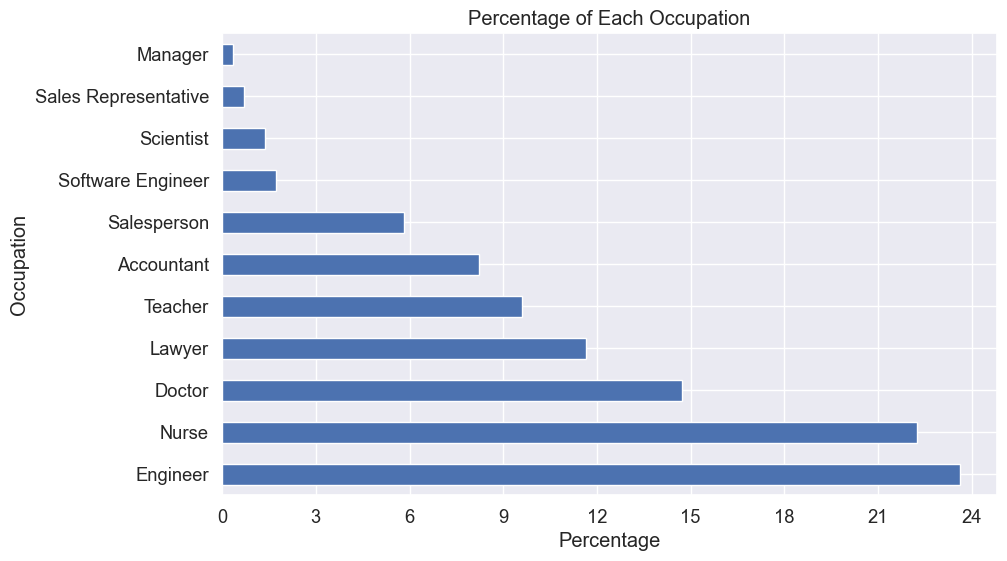

In [72]:
# occupation percentage

occupation_counts = data['Occupation'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='barh')  
plt.title('Percentage of Each Occupation')
plt.xlabel('Percentage')
plt.xticks(range(0, 26, 3))
plt.ylabel('Occupation')
plt.show()

In [73]:
# count number of individuals in occupation

occupation = 'Nurse'
count_individuals_for_specific_occupation = ((data['Occupation'] == occupation)).sum()
print(f"Number of individuals in {occupation } occupation: {count_individuals_for_specific_occupation}")

Number of individuals in Nurse occupation: 65


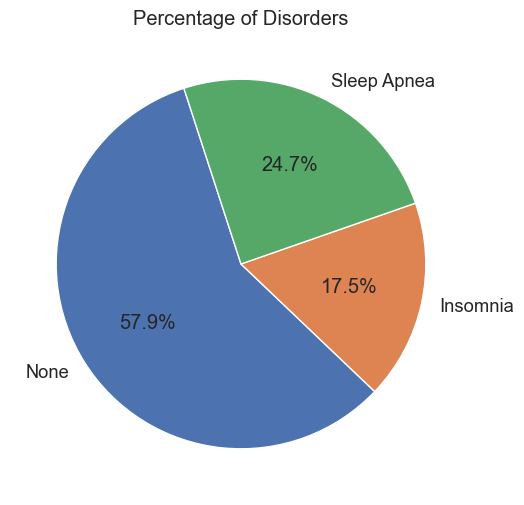

In [74]:
# HEALTH ANALYSIS

# percentage of disorders 

no_disorders_count = (data['Sleep Disorder'] == 'None').sum()
inosmnia_count = (data['Sleep Disorder'] == 'Insomnia').sum()
sleepapnea_count = (data['Sleep Disorder'] == 'Sleep Apnea').sum()

total_count = len(data)

no_disorders_percentage = (no_disorders_count / total_count) * 100
inosmnia_percentage = (inosmnia_count / total_count) * 100
sleepapnea_percentage = (sleepapnea_count / total_count) * 100

labels = ['None', 'Insomnia', 'Sleep Apnea']
sizes = [no_disorders_percentage, inosmnia_percentage, sleepapnea_percentage]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=108)
plt.title('Percentage of Disorders')
plt.show()

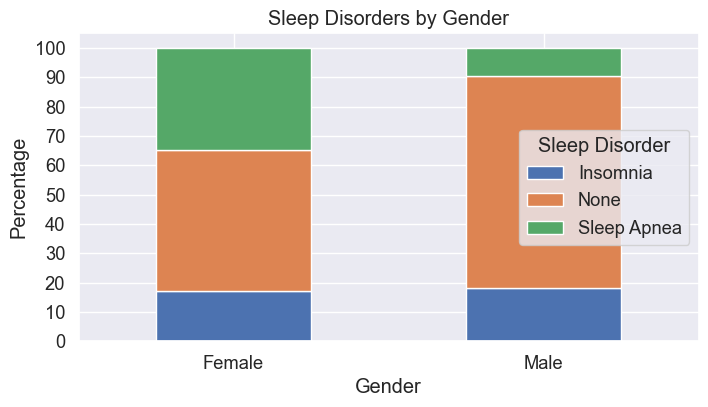

In [75]:
# sleep disorders by gender

sleep_disrorder_by_gender = data.groupby('Gender')['Sleep Disorder'].value_counts(normalize=True) * 100

sleep_disrorder_by_gender = sleep_disrorder_by_gender.unstack()

sleep_disrorder_by_gender.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 101, 10))
plt.legend(title='Sleep Disorder')
plt.show()

<Figure size 2000x800 with 0 Axes>

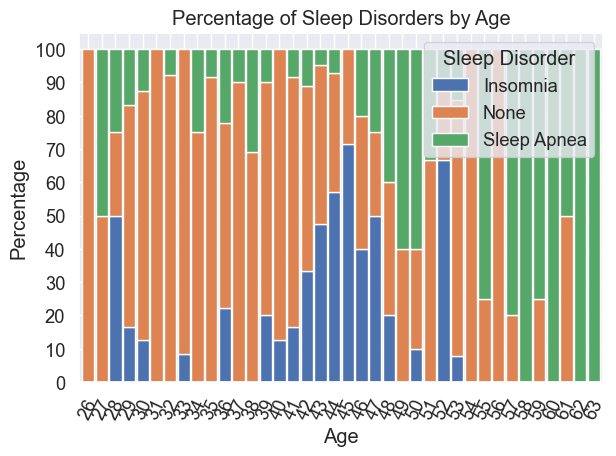

In [76]:
# sleep disorders by age

sleep_disorder_by_age = data.groupby('Age')['Sleep Disorder'].value_counts(normalize=True) * 100

sleep_disorder_by_age = sleep_disorder_by_age.unstack()

plt.figure(figsize=(20, 8))
ax = sleep_disorder_by_age.plot(kind='bar', stacked=True, width=0.9)
plt.title('Percentage of Sleep Disorders by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(rotation=65)
plt.yticks(np.arange(0, 101, 10)) 
plt.legend(title='Sleep Disorder')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# count number of specific sleep disorders for a age group
age = 28
sleep_disorder = 'Insomnia'
count_disoders_for_specific_age_group = ((data['Age'] == age) & (data['Sleep Disorder'] == sleep_disorder)).sum()
print(f"Number of {sleep_disorder} disorders at age {age}: {count_disoders_for_specific_age_group}")

Number of Insomnia disorders at age 28: 2


<Figure size 800x400 with 0 Axes>

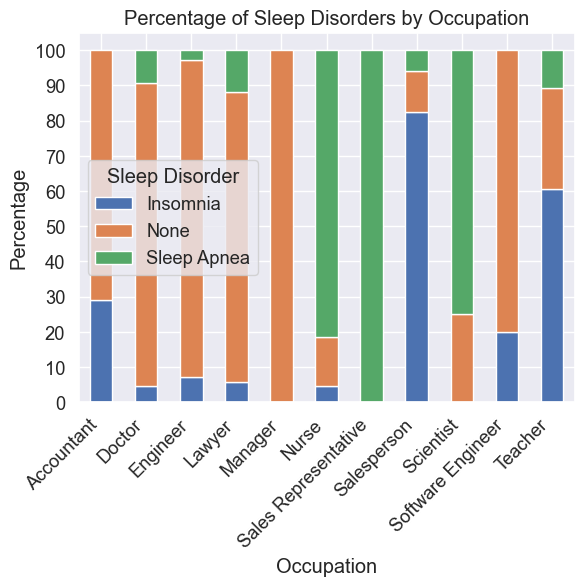

In [78]:
# sleep disorder by occupation 

sleep_disorder_by_occupation = data.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True) * 100

sleep_disorder_by_occupation = sleep_disorder_by_occupation.unstack()

plt.figure(figsize=(8, 4))
sleep_disorder_by_occupation.plot(kind='bar', stacked=True)
plt.title('Percentage of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 101, 10)) 
plt.legend(title='Sleep Disorder')
plt.show()

In [79]:
# count number of specific sleep disorders for occupation
occupation = "Engineer"
sleep_disorder = 'Sleep Apnea'
count_disorders_for_specific_occupation = ((data['Occupation'] == occupation) & (data['Sleep Disorder'] == sleep_disorder)).sum()
print(f"Number of {sleep_disorder} disorders in {occupation} occupation: {count_disorders_for_specific_occupation}")

Number of Sleep Apnea disorders in Engineer occupation: 2


In [80]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours/day),Quality of Sleep,Physical Activity Level (minutes/day),Stress Level,BMI Category,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,26,Doctor,7.3,7,50,6,Normal,114/90,65,8000,None
3,4,Male,32,Sales Representative,6.3,4,30,8,Overweight,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,27,7,Overweight,140/90,85,4200,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Overweight,140/90,85,2500,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Overweight,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,38,Doctor,8.2,8,62,6,Normal,110/70,80,6200,None
9,10,Male,35,Doctor,6.5,6,82,7,Normal,120/80,73,5000,None


<Figure size 800x400 with 0 Axes>

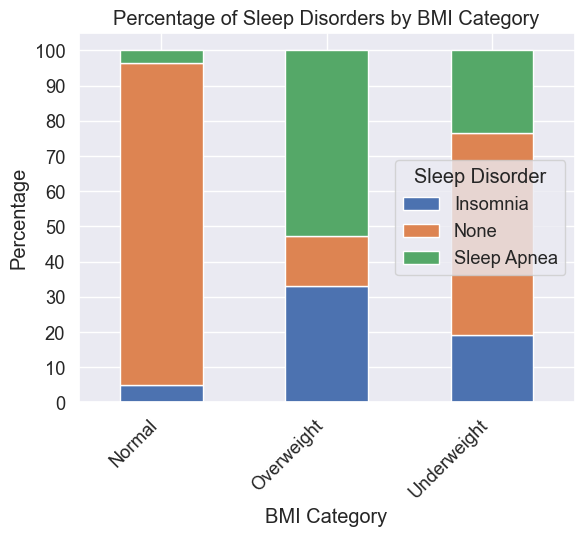

In [81]:
# sleep disorder by BMI category

sleep_disorder_by_bmicategory = data.groupby('BMI Category')['Sleep Disorder'].value_counts(normalize=True) * 100

sleep_disorder_by_bmicategory = sleep_disorder_by_bmicategory.unstack()

plt.figure(figsize=(8, 4))
sleep_disorder_by_bmicategory.plot(kind='bar', stacked=True)
plt.title('Percentage of Sleep Disorders by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 101, 10)) 
plt.legend(title='Sleep Disorder')
plt.show()

<Figure size 800x400 with 0 Axes>

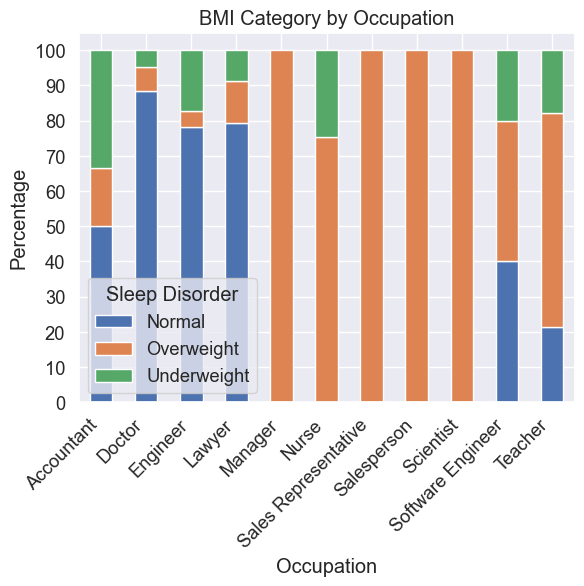

In [82]:
# BMI category by occupation

bmicategory_by_occupation = data.groupby('Occupation')['BMI Category'].value_counts(normalize=True) * 100

bmicategory_by_occupation = bmicategory_by_occupation.unstack()

plt.figure(figsize=(8, 4))
bmicategory_by_occupation.plot(kind='bar', stacked=True)
plt.title('BMI Category by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 101, 10)) 
plt.legend(title='Sleep Disorder')
plt.show()

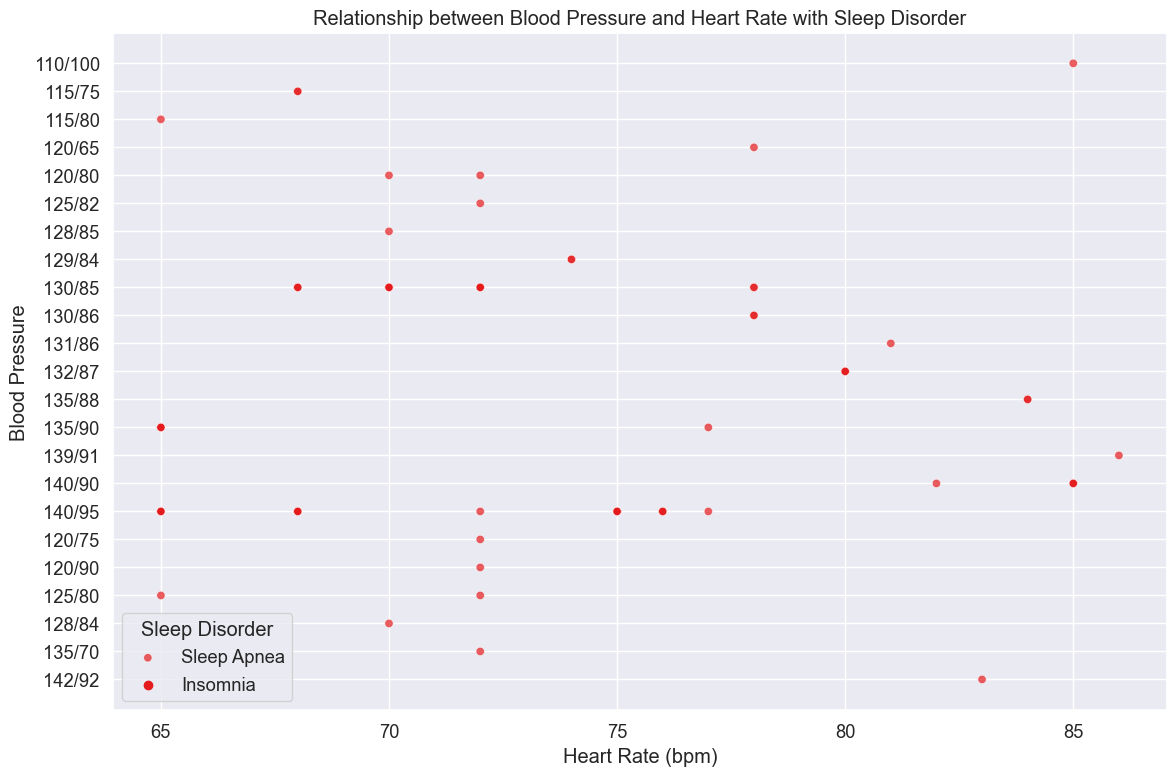

In [83]:
# relationship between heart rate, blood pressure and sleep disorder

plt.figure(figsize=(12, 8))

# Creates new DataFrame, with rows where Sleep Disorder is not "None"
filtered_data = data[data['Sleep Disorder'] != 'None']

# Sorts the filtered data by blood pressure
filtered_data = filtered_data.sort_values(by='Blood Pressure')

# Iterate over each sleep disorder category
for sleep_disorder in filtered_data['Sleep Disorder'].unique():
    # Filter data for the current sleep disorder category
    disorder_data = filtered_data[filtered_data['Sleep Disorder'] == sleep_disorder]
    
    # Plot scatter plot for blood pressure and heart rate, with sleep disorder category as hue
    sns.scatterplot(data=disorder_data, x='Heart Rate (bpm)', y='Blood Pressure', hue='Sleep Disorder', palette='Set1', alpha=0.7)

plt.title('Relationship between Blood Pressure and Heart Rate with Sleep Disorder')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Blood Pressure')

plt.legend(title='Sleep Disorder', labels=filtered_data['Sleep Disorder'].unique())

plt.grid(True)
plt.tight_layout()
plt.show()

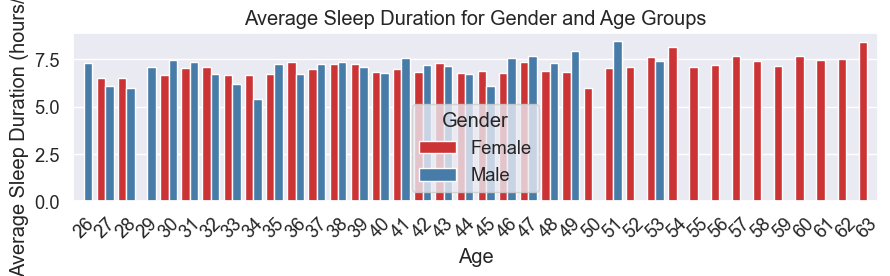

In [84]:
# LIFESTYLE ANALYSIS

# average sleep duration for gender and age
avg_sleep_duration = data.groupby(['Gender', 'Age'])['Sleep Duration (hours/day)'].mean().reset_index()

# Plotting the average sleep duration for gender and age groups
plt.figure(figsize=(9, 3))
sns.barplot(data=avg_sleep_duration, x='Age', y='Sleep Duration (hours/day)', hue='Gender', palette='Set1', dodge=True)
plt.title('Average Sleep Duration for Gender and Age Groups')
plt.xlabel('Age')
plt.ylabel('Average Sleep Duration (hours/day)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

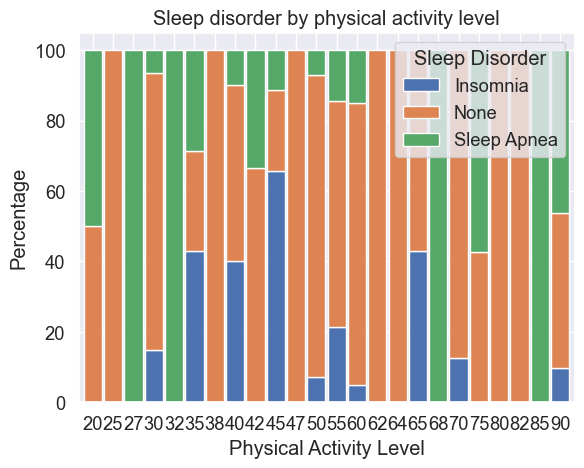

In [85]:
# sleep disorder by physical activity level

physicalactivity_by_disorder = data.groupby('Physical Activity Level (minutes/day)')['Sleep Disorder'].value_counts(normalize=True) * 100

physicalactivity_by_disorder = physicalactivity_by_disorder.unstack()

plt.figure(figsize=(8, 4))
physicalactivity_by_disorder.plot(kind='bar', stacked=True, width=0.9)
plt.title('Sleep disorder by physical activity level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Sleep Disorder')
plt.show()

In [86]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours/day),Quality of Sleep,Physical Activity Level (minutes/day),Stress Level,BMI Category,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,26,Doctor,7.3,7,50,6,Normal,114/90,65,8000,None
3,4,Male,32,Sales Representative,6.3,4,30,8,Overweight,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,27,7,Overweight,140/90,85,4200,Sleep Apnea


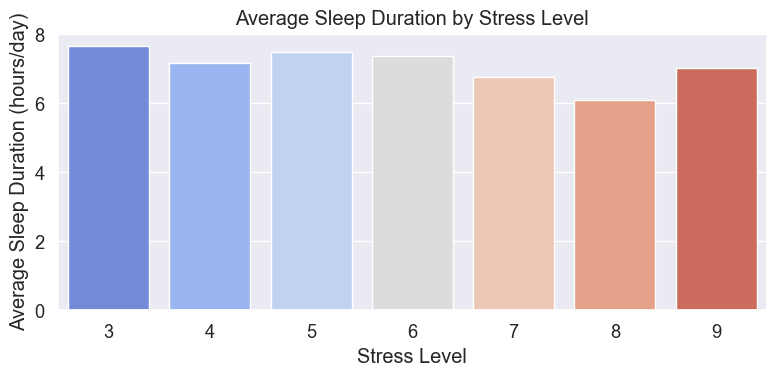

In [87]:
# average sleep duration by stress level

sleep_by_stress = data.groupby('Stress Level')['Sleep Duration (hours/day)'].mean().reset_index()

# Plot stress level by average sleep duration
plt.figure(figsize=(8, 4))
sns.barplot(x='Stress Level', y='Sleep Duration (hours/day)', data=sleep_by_stress, palette='coolwarm')
plt.title('Average Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Sleep Duration (hours/day)')
plt.tight_layout()
plt.show()

In [88]:
# MODEL

from sklearn.preprocessing import StandardScaler

data.drop(columns=['Person ID'], inplace=True)

In [89]:
data.head(20)

,Gender,Age,Occupation,Sleep Duration (hours/day),Quality of Sleep,Physical Activity Level (minutes/day),Stress Level,BMI Category,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,26,Doctor,7.3,7,50,6,Normal,114/90,65,8000,None
3,Male,32,Sales Representative,6.3,4,30,8,Overweight,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,27,7,Overweight,140/90,85,4200,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Overweight,140/90,85,2500,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Overweight,140/90,82,3500,Insomnia
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,Male,38,Doctor,8.2,8,62,6,Normal,110/70,80,6200,None
9,Male,35,Doctor,6.5,6,82,7,Normal,120/80,73,5000,None


In [90]:
# SCALING

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

data_model = data.copy()

num_cols = ['Age', 'Sleep Duration (hours/day)', 'Quality of Sleep', 'Physical Activity Level (minutes/day)', 'Stress Level', 'Heart Rate (bpm)', 'Daily Steps']

scaler = MinMaxScaler()

data_model[num_cols] = scaler.fit_transform(data_model[num_cols])

# LabelEncoding target column

target_column = 'Sleep Disorder'

label_encoder = LabelEncoder()
data_model[target_column] = label_encoder.fit_transform(data_model[target_column])

print("Class labels:", label_encoder.classes_)


Class labels: ['Insomnia' 'None' 'Sleep Apnea']


In [91]:
data_model.head(20)

,Gender,Age,Occupation,Sleep Duration (hours/day),Quality of Sleep,Physical Activity Level (minutes/day),Stress Level,BMI Category,Blood Pressure,Heart Rate (bpm),Daily Steps,Sleep Disorder
0,Male,0.027027,Software Engineer,0.456522,0.571429,0.314286,0.500000,Overweight,126/83,0.633333,0.2750,1
1,Male,0.054054,Doctor,0.478261,0.571429,0.571429,0.833333,Normal,125/80,0.566667,1.0000,1
2,Male,0.000000,Doctor,0.717391,0.714286,0.428571,0.500000,Normal,114/90,0.233333,0.7500,1
3,Male,0.162162,Sales Representative,0.500000,0.285714,0.142857,0.833333,Overweight,140/90,0.900000,0.1250,2
4,Male,0.054054,Sales Representative,0.413043,0.285714,0.100000,0.666667,Overweight,140/90,0.900000,0.2750,2
5,Male,0.054054,Software Engineer,0.413043,0.285714,0.142857,0.833333,Overweight,140/90,0.900000,0.0625,0
6,Male,0.081081,Teacher,0.500000,0.571429,0.285714,0.666667,Overweight,140/90,0.800000,0.1875,0
7,Male,0.081081,Doctor,0.826087,0.714286,0.785714,0.500000,Normal,120/80,0.400000,0.7500,1
8,Male,0.324324,Doctor,0.913043,0.857143,0.600000,0.500000,Normal,110/70,0.733333,0.5250,1
9,Male,0.243243,Doctor,0.543478,0.571429,0.885714,0.666667,Normal,120/80,0.500000,0.3750,1


In [92]:
# ONE HOT ENCODING OTHER CATEGORICAL COLUMNS 

remaining_catergorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

encoded_columns = pd.get_dummies(data_model[remaining_catergorical_columns], drop_first=False)

data_encoded = pd.concat([data_model.drop(columns=remaining_catergorical_columns), encoded_columns], axis=1)

In [93]:
print(data_encoded.columns) # main dataframe now 

Index(['Age', 'Sleep Duration (hours/day)', 'Quality of Sleep',
       'Physical Activity Level (minutes/day)', 'Stress Level',
       'Heart Rate (bpm)', 'Daily Steps', 'Sleep Disorder', 'Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Normal', 'BMI Category_Overweight',
       'BMI Category_Underweight', 'Blood Pressure_108/83',
       'Blood Pressure_110/100', 'Blood Pressure_110/70',
       'Blood Pressure_110/75', 'Blood Pressure_110/76',
       'Blood Pressure_110/77', 'Blood Pressure_114/90',
       'Blood Pressure_115/65', 'Blood Pressure_115/70',
       'Blood Pressure_115/75', 'Blood Pressure_115/78',
       'Blood Pressure_115/80', 'Blood Pressure_115/85',
       'Blood 

In [108]:
# SPLITTING DATA TO TRAINING AND TESTING 

from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['Sleep Disorder'])

y = data_encoded['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (233, 69) (233,)
Testing set shape: (59, 69) (59,)


In [109]:
# CREATING MODEL USING GRADIENT BOOSTING ALGORITHM

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_classifier.predict(X_test)

In [110]:
# EVALUATING ALGORITHM

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\n")

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
print("\n")

# FEATURE IMPORTANCES
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
import pandas as pd
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Accuracy: 0.7966101694915254


Confusion Matrix:
[[ 8  1  4]
 [ 2 28  2]
 [ 1  2 11]]


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.90      0.88      0.89        32
           2       0.65      0.79      0.71        14

    accuracy                           0.80        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.80      0.80      0.80        59





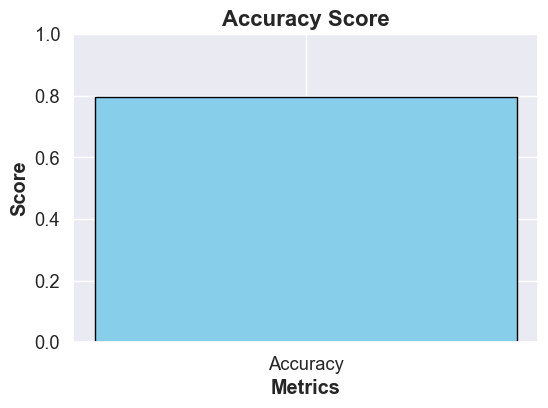

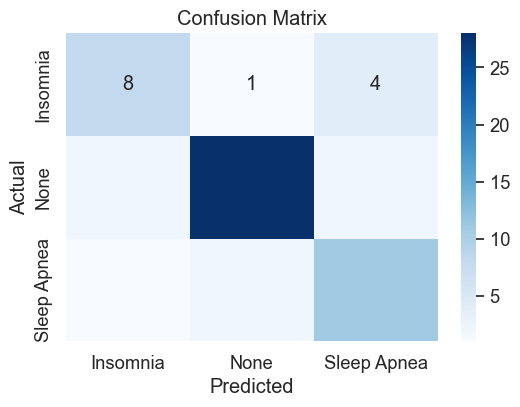

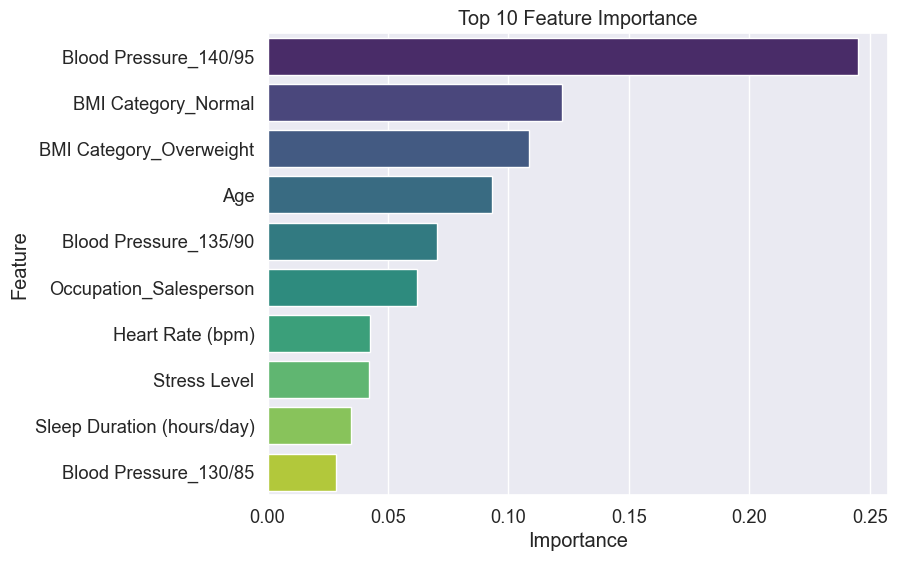

In [111]:
# Plot accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue', edgecolor='black')
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Accuracy Score', fontsize=16, fontweight='bold')
plt.ylim(0, 1)
plt.show()

# Plot confusion matrix
labels = ['Insomnia', 'None', 'Sleep Apnea']

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Select top N features (e.g., top 10)
top_features_df = feature_importance_df.head(10)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [112]:
# k-NN MODEL

from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier with k=5 (you can adjust this number)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_classifier.predict(X_test)

In [113]:
# EVALUATING ALGORITHM

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\n")

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
print("\n")

Accuracy: 0.7966101694915254


Confusion Matrix:
[[ 8  1  4]
 [ 2 28  2]
 [ 1  2 11]]


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.90      0.88      0.89        32
           2       0.65      0.79      0.71        14

    accuracy                           0.80        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.80      0.80      0.80        59



